In [126]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# Importing the dataset
dataset = pd.read_csv('train.csv')
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
# EDA
# Handling Missing Data
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

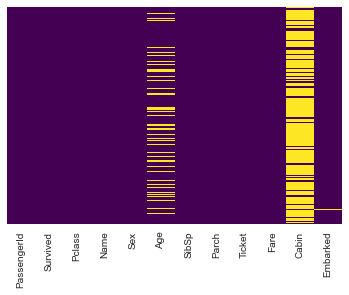

In [129]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

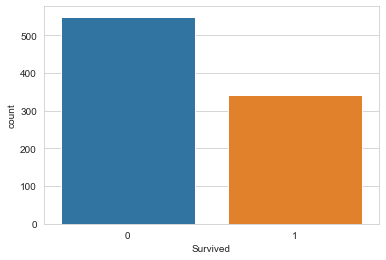

In [130]:
# Plots
sns.set_style('whitegrid')
sns.countplot(x='Survived', data = dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

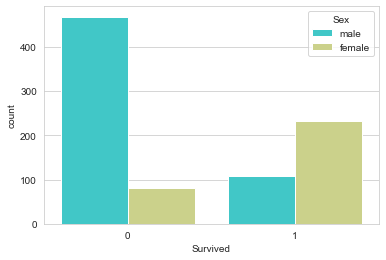

In [131]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=dataset, hue='Sex', palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

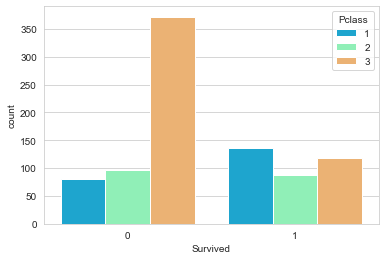

In [132]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=dataset, hue='Pclass', palette='rainbow')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

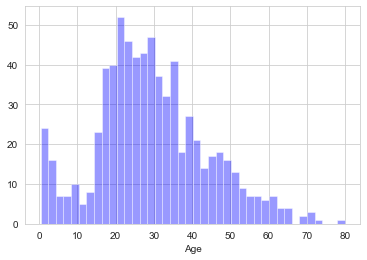

In [133]:
sns.distplot(dataset['Age'].dropna(), kde=False, color='blue', bins=40)

<AxesSubplot:>

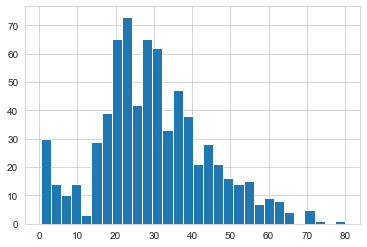

In [134]:
dataset['Age'].hist(bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

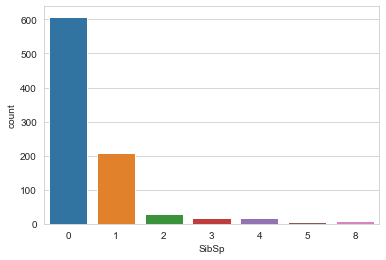

In [135]:
sns.countplot(x='SibSp', data = dataset)

<AxesSubplot:>

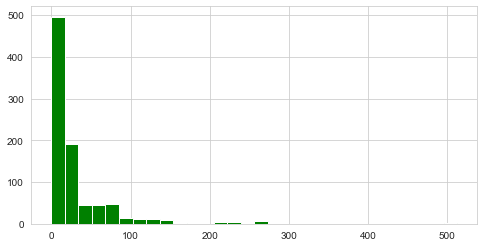

In [136]:
dataset['Fare'].hist(bins=30, color='green', figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

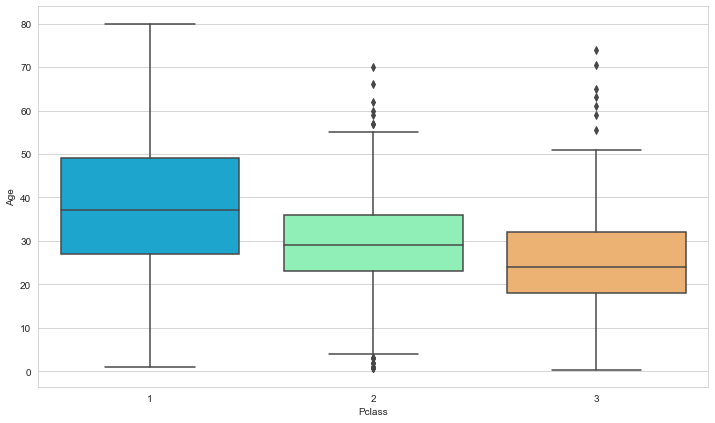

In [137]:
# Data Cleaning
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=dataset, palette='rainbow')

In [138]:
def impute_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [139]:
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age, axis =1)

<AxesSubplot:>

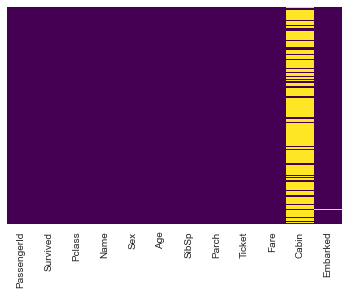

In [140]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [141]:
dataset.drop('Cabin', axis=1, inplace= True)

In [142]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [143]:
dataset.dropna(inplace=True)

<AxesSubplot:>

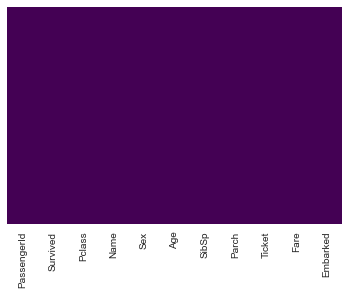

In [144]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [145]:
# Converting categorical data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [146]:
pd.get_dummies(dataset['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [147]:
embark = pd.get_dummies(dataset['Embarked'], drop_first=True)
sex = pd.get_dummies(dataset['Sex'], drop_first=True)

In [148]:
dataset.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [149]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [150]:
dataset = pd.concat([dataset,sex,embark], axis = 1)

In [151]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [152]:
# Building a model
X = dataset.drop('Survived',axis =1)
y = dataset['Survived']

In [153]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [154]:
# Training the Logistic Regression on Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [155]:
# Predicting the test results
y_pred = classifier.predict(X_test)
print(y_pred)


[1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1
 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 1]


In [156]:
# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(y_test, y_pred)
print(cf)
accuracy_score(y_test, y_pred)


[[133  24]
 [ 37  73]]


0.7715355805243446

In [157]:
# Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       157
           1       0.75      0.66      0.71       110

    accuracy                           0.77       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267

